## 1.2. a.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(42)

In [2]:
def preferential_attachment(T, seed=42):
    if seed is not None:
        np.random.seed(seed)
    
    G = nx.Graph()
    G.add_edge(0, 1)
    
    for new_node in range(2, T):
        degrees = [G.degree(i) for i in range(new_node)]
        total_degree = sum(degrees)
        probs = np.array(degrees, dtype=float) / total_degree
        target = np.random.choice(new_node, p=probs)
        G.add_edge(new_node, target)
    
    degrees = [G.degree(i) for i in range(T)]
    return G, degrees

In [3]:
T = 300
G_pa, degrees_pa = preferential_attachment(T, seed=42)
print(f"Preferential attachment: n={G_pa.number_of_nodes()}, m={G_pa.number_of_edges()}")
print(f"Degree sequence (first 20): {degrees_pa[:20]}")
print(f"Max degree: {max(degrees_pa)}")

Preferential attachment: n=300, m=299
Degree sequence (first 20): [43, 6, 21, 8, 6, 7, 19, 7, 1, 7, 8, 2, 4, 1, 1, 3, 1, 2, 7, 8]
Max degree: 43


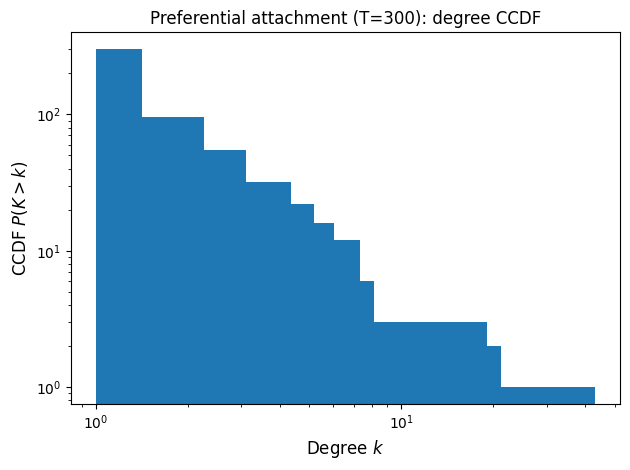

In [4]:
positive_degrees = [d for d in degrees_pa if d > 0]
plt.hist(positive_degrees, cumulative=-1, bins=100)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree $k$', fontsize=12)
plt.ylabel('CCDF $P(K > k)$', fontsize=12)
plt.title('Preferential attachment (T=300): degree CCDF')
plt.tight_layout()
plt.show()

## 1.2 b.

In [5]:
def configuration_model(k, seed=42):
    v = []
    for i, k_i in enumerate(k):
        for _ in range(k_i):
            v.append(i)

    np.random.seed(seed)
    np.random.shuffle(v)

    m = len(v) // 2
    edges = [(v[2*j], v[2*j+1]) for j in range(m)]
    # regenerate since some edges might be self-loops
    # for u, v in edges:
    #     if u == v:
    #         return configuration_model(k, seed=seed+1)
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

In [6]:
G_config = configuration_model(degrees_pa, seed=42)
print(f"Configuration model: n={G_config.number_of_nodes()}, m={G_config.number_of_edges()}")

Configuration model: n=300, m=291


## 1.1 c.

Graph plotting code is Cursored.

In [7]:
def plot_graph(G, title, ax=None, node_size=30, seed=42):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=seed)
    nx.draw_networkx(G, pos=pos, with_labels=False, node_size=node_size, 
                     edge_color='silver', alpha=0.7, ax=ax)
    ax.set_title(title)
    ax.axis('off')
    return ax

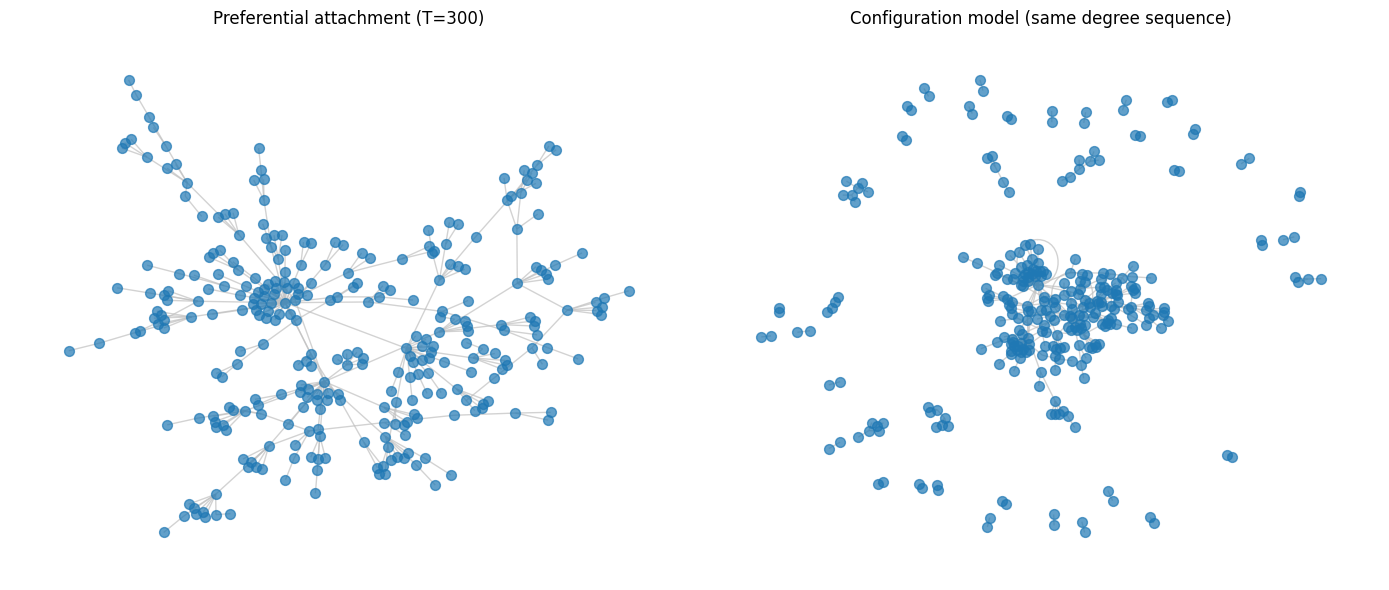

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_graph(G_pa, 'Preferential attachment (T=300)', ax=axes[0], node_size=50)
plot_graph(G_config, 'Configuration model (same degree sequence)', ax=axes[1], node_size=50)
plt.tight_layout()
plt.show()

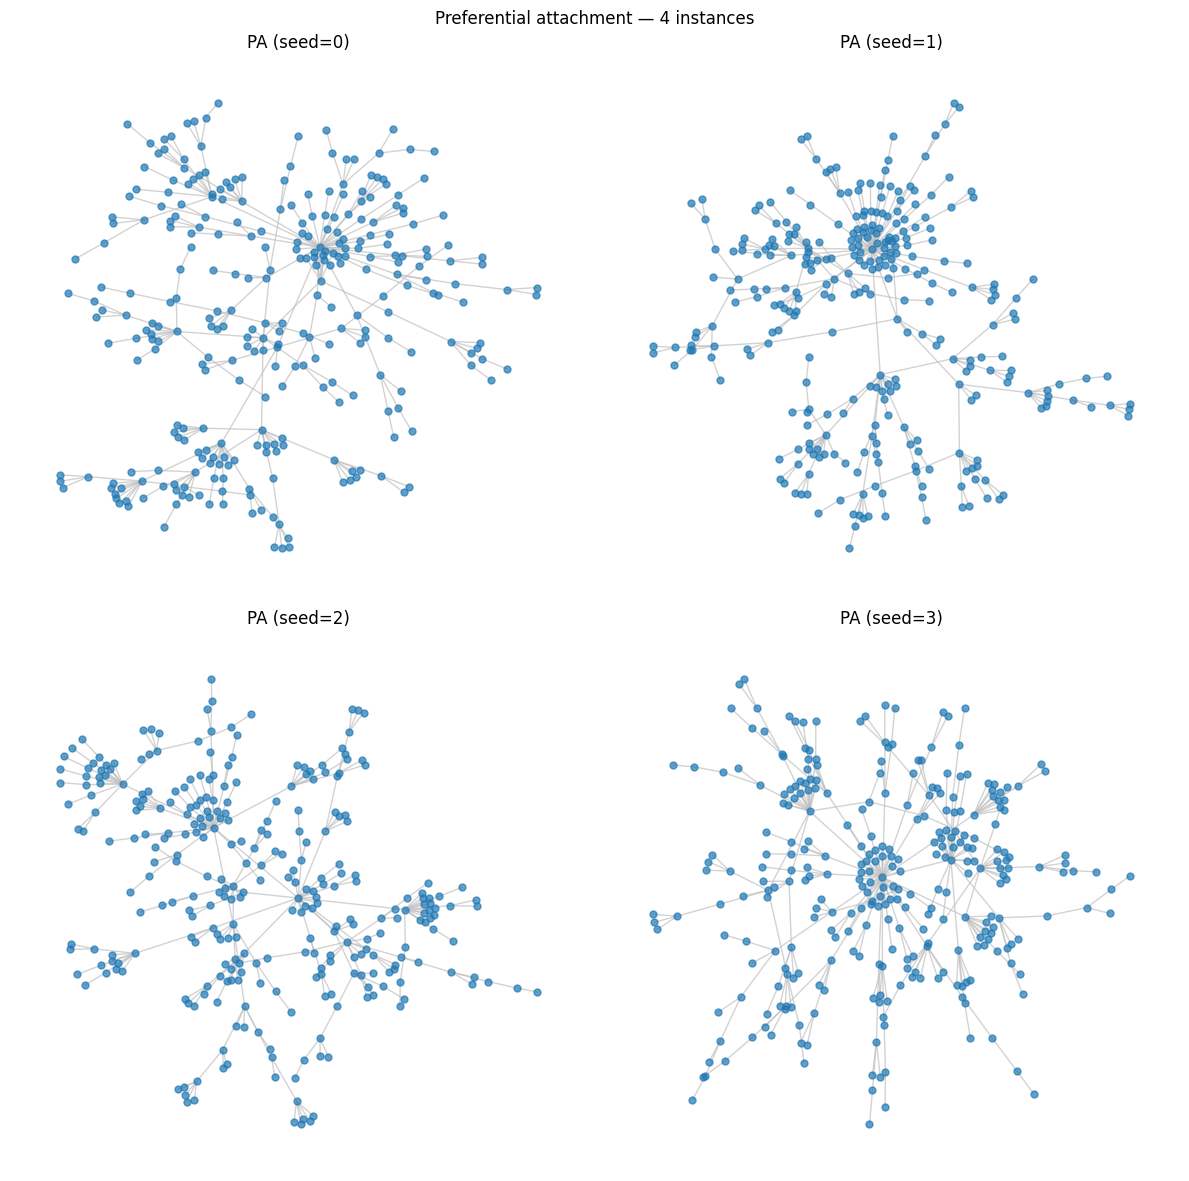

In [9]:
# Multiple instances to see stochasticity
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for i, seed in enumerate([0, 1, 2, 3]):
    G_pa_i, deg_i = preferential_attachment(T, seed=seed)
    G_cfg_i = configuration_model(deg_i, seed=seed)
    ax = axes[i // 2, i % 2]
    plot_graph(G_pa_i, f'PA (seed={seed})', ax=ax, node_size=25)
plt.suptitle('Preferential attachment — 4 instances', fontsize=12)
plt.tight_layout()
plt.show()

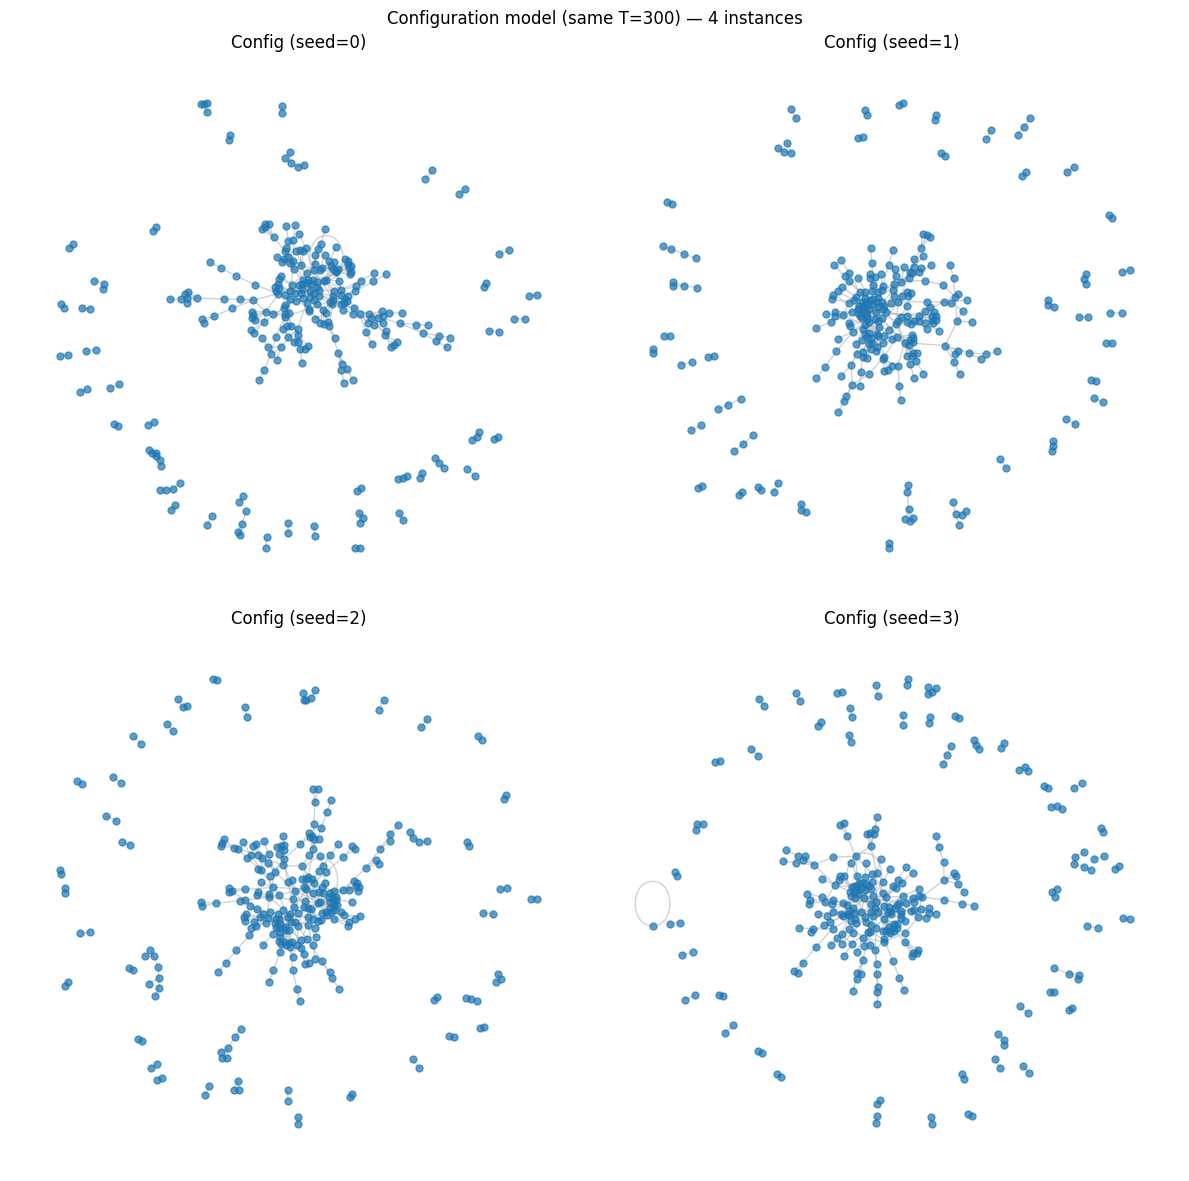

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for i, seed in enumerate([0, 1, 2, 3]):
    _, deg_i = preferential_attachment(T, seed=seed)
    G_cfg_i = configuration_model(deg_i, seed=seed)
    ax = axes[i // 2, i % 2]
    plot_graph(G_cfg_i, f'Config (seed={seed})', ax=ax, node_size=25)
plt.suptitle('Configuration model (same T=300) — 4 instances', fontsize=12)
plt.tight_layout()
plt.show()